# Logistic Regression

### Classification

- Spam vs No Spam Problem
    - Input: Bunch of words
    - Output: Probability of being spam

### Basic Comparison

- Linear Regression:
    - Output: Numeric Values
- Logistic Regression:
    - Probability of given input belonging to a class
    
### Linear Regression vs Logistic Regression examples

- ** Linear Regression **:
    - Input: [2]
    - y = 2x
    - Output: 4
- ** Logistic Regression **:
    - Input: "Sign up to get 1 million dollars tonight"
    - Output: p = 0.8

## Linear Regression Example

Does not works well with classification problems

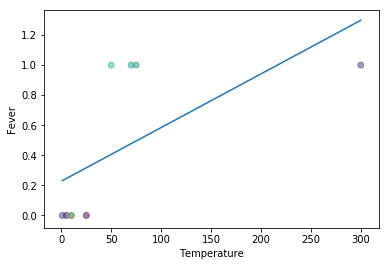

In [63]:
import numpy as np
import matplotlib.pyplot as plt

x = [1, 5, 10, 10, 25, 50, 70, 75, 300]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1]

colors = np.random.rand(len(x))
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.ylabel('Fever')
plt.xlabel('Temperature')

plt.scatter(x, y, c = colors, alpha=0.5)

### Loading A Dataset

* Steps:
    - 1: Load Dataset
    - 2: Make dataset iterable
    - 3: Create Model Class
    - 4: Instantiate model class
    - 5: Instantiate Loss class
    - 6: Instantiate Optimizer class
    - 7: Train model

# Step 1. Loading the datasets (Train & Tests)

In [64]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [65]:
train_dataset = dsets.MNIST(root="./data", train=True, transform=transforms.ToTensor(), download=True)

In [66]:
len(train_dataset)

60000

In [67]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [68]:
# Type
print(type(train_dataset[0]))

# Image of 28 x 28 Pixels
print(train_dataset[0][0].shape)

# Label (Class 5)
print(train_dataset[0][1])

<class 'tuple'>
torch.Size([1, 28, 28])
tensor(5)


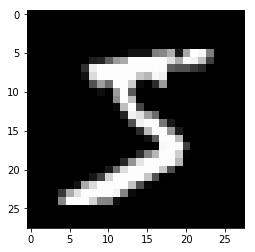

In [69]:
### Displaying MINST
import matplotlib.pyplot as plt
import numpy as np

show_img = train_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')

tensor(0)


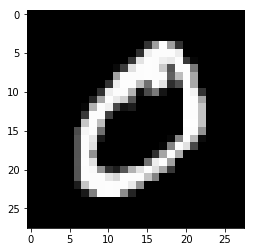

In [70]:
show_img = train_dataset[1][0].numpy().reshape(28, 28)

# Label (Class 5)
print(train_dataset[1][1])

plt.imshow(show_img, cmap='gray')

### Importing a test dataset

In [71]:
test_dataset = dsets.MNIST(root="./data", train=False, transform=transforms.ToTensor(), download=True)

In [72]:
print(len(test_dataset))
print(test_dataset[0][1])

10000
tensor(7)


tensor(7)


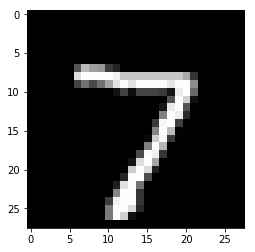

In [73]:
show_img = test_dataset[0][0].numpy().reshape(28, 28)
print(test_dataset[0][1])

plt.imshow(show_img, cmap='gray')

# Step 2. Make datasets iterable

In [74]:
print(len(train_dataset))

batch_size = 100
n_iters = 3000

60000


In [75]:
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
num_epochs

5

In [76]:
# Create iterable object for Train Dataset
import collections

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size = batch_size, shuffle=True)
isinstance(train_loader, collections.Iterable)

True

In [77]:
# Create iterable object for Test Dataset
import collections

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size = batch_size, shuffle=True)
isinstance(test_loader, collections.Iterable)

True

# Step 3. Building Model

In [78]:
# Same as linear regression
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

# Step 4. Instantiate the model
    - Input Size:
        - Size of image (28 x 28) = 784
    - Output dimension:
        - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

In [79]:
dset_shape = train_dataset[0][0].numpy().shape;

input_dim = dset_shape[1] * dset_shape[2]
output_dim = 10

model = LinearRegressionModel(input_dim, output_dim)

# Step 5. Instantiate Loss Class

In [80]:
criterion = nn.CrossEntropyLoss()

# Step 6. Instantiate Optimizer Class

In [81]:
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [82]:
print(model.parameters())

print(len(list(model.parameters())[0].size()))
print(len(list(model.parameters())[1].size()))

<generator object Module.parameters at 0x1843e3888>
2
1


# Step 7. Train the model

In [88]:
iter = 0

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as Variable
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entrpy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            
            for images, labels in test_loader:
                images = Variable(images.view(-1, 28*28))
                
                outputs = model(images)
                
                # Predictions of the maximium value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of values
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()
                
            accuracy = 100 * correct / total
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data[0], accuracy))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Iteration: 500. Loss: 1.2170994281768799. Accuracy: 82
Iteration: 1000. Loss: 0.8801231384277344. Accuracy: 83
Iteration: 1500. Loss: 0.7714765667915344. Accuracy: 83
Iteration: 2000. Loss: 0.9383812546730042. Accuracy: 84
Iteration: 2500. Loss: 0.7638614177703857. Accuracy: 84
Iteration: 3000. Loss: 0.9075745940208435. Accuracy: 84


### How does PyTorch outputs predictions?

In [99]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)

    if iter_test == 1:
        print('Outputs')
        print('Likely, the image is the biggest number in the tensor position')
        print(outputs[0])
        print('Prediction')
        print(predicted[0])
        print('Label')
        print(labels[0])

Outputs
Likely, the image is the biggest number in the tensor position
tensor([-1.1434, -0.2708,  0.9271, -1.0604,  0.0784, -0.4989,  3.0722, -1.9423,
         1.1996,  0.1954], grad_fn=<SelectBackward>)
Prediction
tensor(6)
Label
tensor(6)
